In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Q1

## Read 1.jpg image

(-0.5, 639.5, 426.5, -0.5)

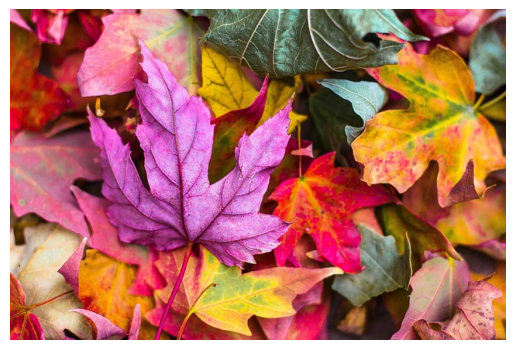

In [4]:
img1_path = 'images/1.jpg'
img1 = cv2.imread(img1_path, cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')

## Q1.1: RGB to CMYK & CMYK to RGB

In [5]:
def RGB_to_CMYK(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):
    """
    Convert RGB values to CMYK values.
    Args:
        r (numpy.ndarray): Red channel values.
        g (numpy.ndarray): Green channel values.
        b (numpy.ndarray): Blue channel values.
        RGB_SCALE (int): Scale factor for RGB values. Default is 255.
        CMYK_SCALE (int): Scale factor for CMYK values. Default is 100.
    Returns:
        c (numpy.ndarray): Cyan channel values.
        m (numpy.ndarray): Magenta channel values.
        y (numpy.ndarray): Yellow channel values.
        k (numpy.ndarray): Black channel values.
    """
    r = r.astype(np.float32) / RGB_SCALE
    g = g.astype(np.float32) / RGB_SCALE
    b = b.astype(np.float32) / RGB_SCALE

    # Extract out K [0,1]
    k = 1 - np.max(np.array([r, g, b]), axis=0)
    epsilon = 1e-8

    c = (1 - k - r) / (1 - k + epsilon)
    m = (1 - k - g) / (1 - k + epsilon)
    y = (1 - k - b) / (1 - k + epsilon)

    # Rescale to the range [0,CMYK_SCALE]
    c, m, y, k = np.array([c, m, y, k]) * CMYK_SCALE

    return c, m, y, k

In [6]:
def CMYK_to_RGB(c, m, y, k, RGB_SCALE = 255, CMYK_SCALE = 100):
    """
    Convert CMYK values to RGB values.
    Args:
        c (numpy.ndarray): Cyan channel values.
        m (numpy.ndarray): Magenta channel values.
        y (numpy.ndarray): Yellow channel values.
        k (numpy.ndarray): Black channel values.
        RGB_SCALE (int): Scale factor for RGB values. Default is 255.
        CMYK_SCALE (int): Scale factor for CMYK values. Default is 100.
    Returns:
        r (numpy.ndarray): Red channel values.
        g (numpy.ndarray): Green channel values.
        b (numpy.ndarray): Blue channel values.
    """
    #############
    c, m, y, k = np.array([c, m, y, k]) / CMYK_SCALE

    r = (1 - k) * (1 - c)
    g = (1 - k) * (1 - m)
    b = (1 - k) * (1 - y)

    r, g, b = np.array([r, g, b]) * RGB_SCALE
    #############

    return r, g, b

## Q1.2: RGB to HSI

In [7]:
def RGB_to_HSI(r, g, b):
    """
    Convert RGB values to HSI values.
    Args:
        r (numpy.ndarray): Red channel values.
        g (numpy.ndarray): Green channel values.
        b (numpy.ndarray): Blue channel values.
    Returns:
        h (numpy.ndarray): Hue channel values. Range[0, 360]
        s (numpy.ndarray): Saturation channel values. Range[0, 255]
        i (numpy.ndarray): Intensity channel values. Range[0, 255]
    """

    #############
    r, g, b = r/255., g/255., b/255. # Normalize each channel
    epsilon = 1e-8

    # Calculate i: i = (r + g + b) / 3
    i = np.mean(np.array([r, g, b]), axis=0)
    i = np.round(i * 255) # [0, 1) -> [0, 255)

    # Calculate s: s = 1 - 3 * min(r, g, b) / sum(r, g, b)
    min_rgb = np.min(np.array([r, g, b]), axis=0)
    s = 1 - 3 * (min_rgb) / (r + g + b + epsilon)
    s = np.round(s * 255) # [0, 1) -> [0, 255)

    # Calculate h
    theta = np.arccos(((r - g) + (r - b)) / (2 * ((r - g)**2 + (r - b) * (g - b))**0.5 + epsilon))
    h = (180 / np.pi) * theta # convert rad to degree
    h[b > g] = 360 - h[b > g]

    return h, s, i

## Show result image for all functions

In [8]:
# Source code of this function:
# https://stackoverflow.com/questions/52939362/trouble-displaying-image-hsi-converted-to-rgb-python

def show_images(T, cols=1):
    """
    Display multiple images in a grid.
    Args:
        T (list): List of tuples containing image and title.
        cols (int): Number of columns in the grid. Default is 1.
    """
    N = len(T)
    fig = plt.figure()
    for i in range(N):
        a = fig.add_subplot(int(np.ceil(N/float(cols))), cols, i+1)
        try:
            img,title = T[i]
        except ValueError:
            img,title = T[i], "Image %d" % (i+1)
        if(img.ndim == 2):
            plt.gray()
        plt.imshow(img)
        a.set_title(title)
        plt.xticks([0,img.shape[1]]), plt.yticks([0,img.shape[0]])
    fig.set_size_inches(np.array(fig.get_size_inches()) * N)
    plt.show()

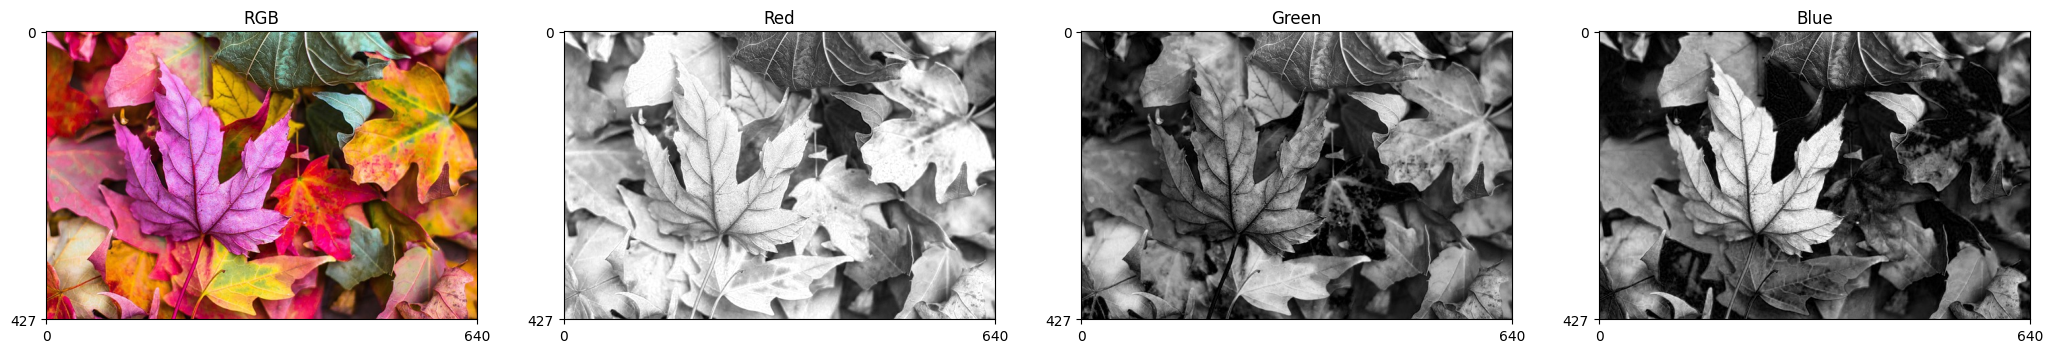

In [9]:
show_images(
    [
        (img1,"RGB"),
        (img1[:,:,0],"Red"),
        (img1[:,:,1],"Green"),
        (img1[:,:,2],"Blue")
        ], 4)

### Show result of RGB_to_CMYK

In [10]:
c, m, y, k = RGB_to_CMYK(img1[:,:,0], img1[:,:,1], img1[:,:,2])
cmyk = (np.dstack((c, m, y, k)) * 2.55).astype(np.uint8)  # Normalize to [0, 255]

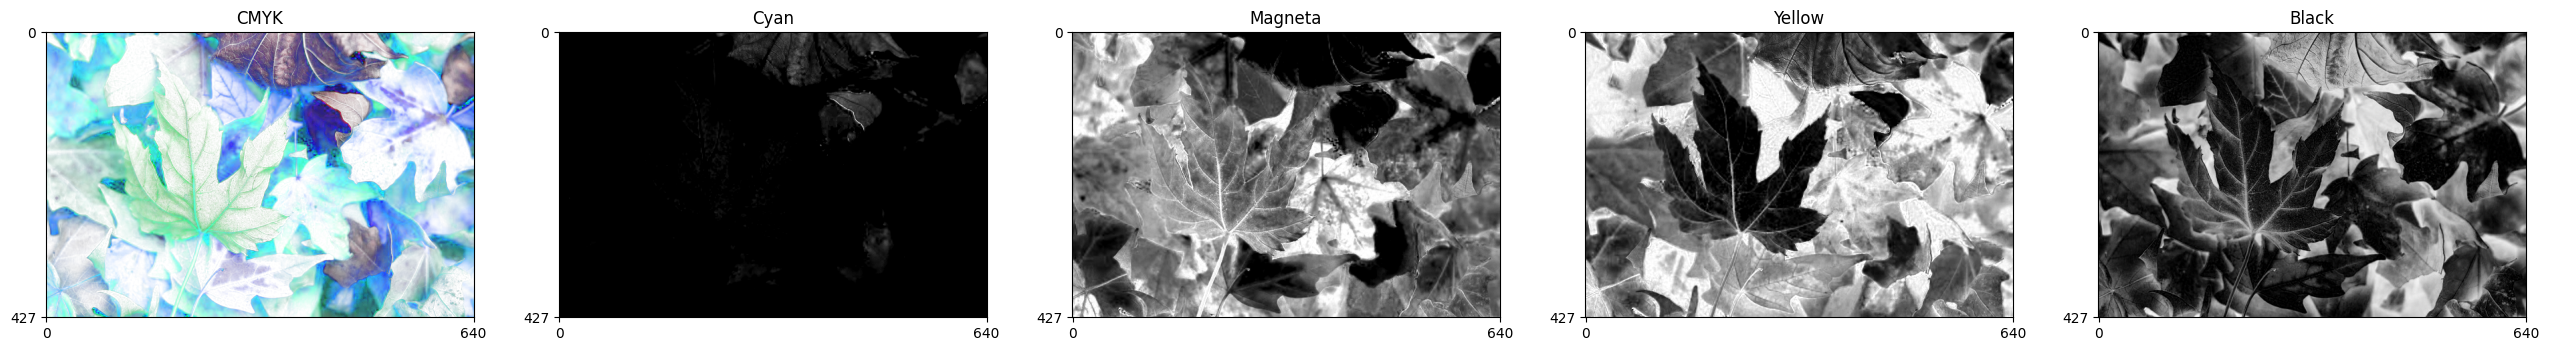

In [11]:
show_images(
    [
        (cmyk,"CMYK"),
        (c,"Cyan"),
        (m,"Magneta"),
        (y,"Yellow"),
        (k,"Black")
        ], 5)

### Show result of CMYK_to_RGB

In [12]:
r,g,b = CMYK_to_RGB(c, m, y, k)
rgb = (np.dstack((r, g, b))).astype(np.uint8)

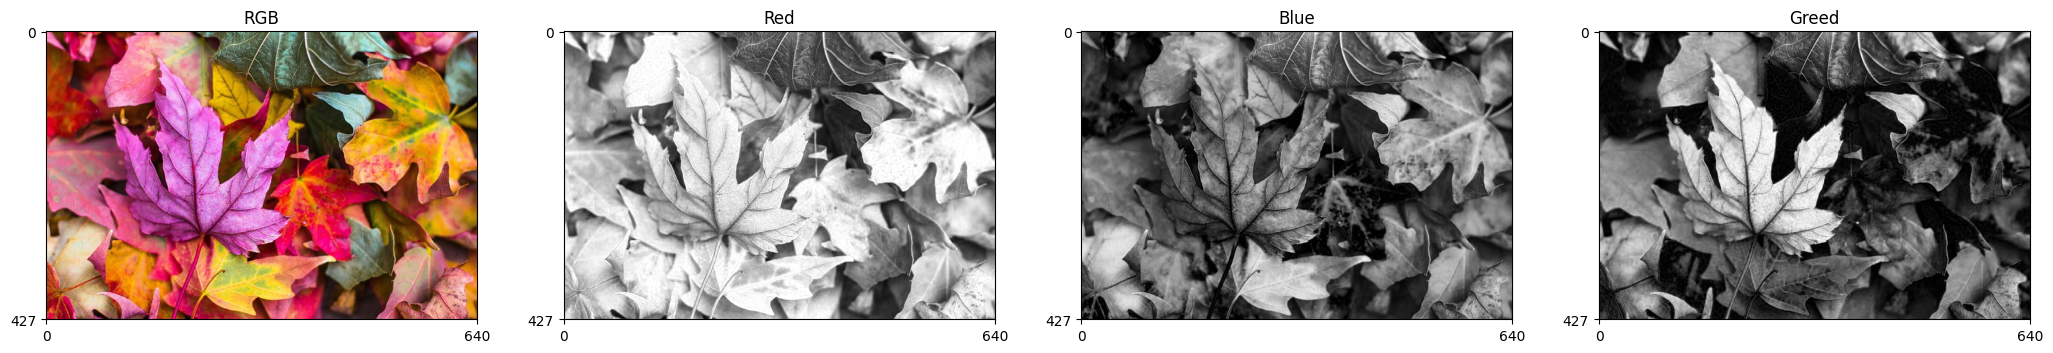

In [13]:
show_images(
    [
        (rgb,"RGB"),
        (r,"Red"),
        (g,"Blue"),
        (b,"Greed")
        ], 4)

### Show result of RGB_to_HSI

In [14]:
h, s, i = RGB_to_HSI(img1[:,:,0], img1[:,:,1], img1[:,:,2])
hsi = (np.dstack((h, s, i))).astype(np.uint8)

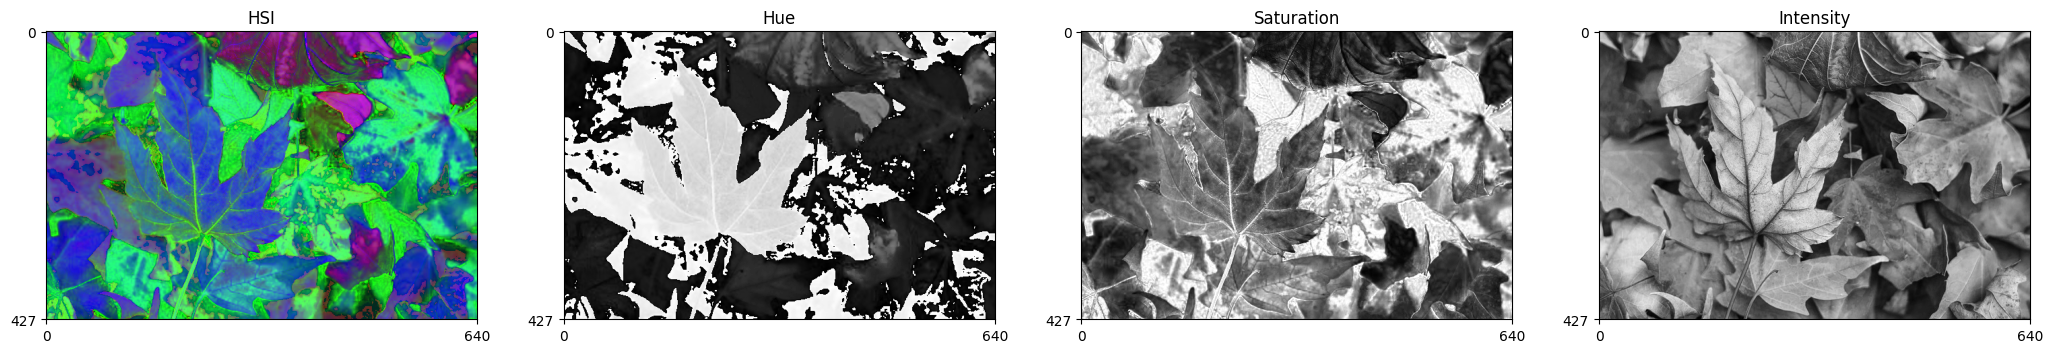

In [15]:
show_images(
    [
        (hsi,"HSI"),
        (h,"Hue"),
        (s,"Saturation"),
        (i,"Intensity")
        ], 4)

### Show all of the conversions

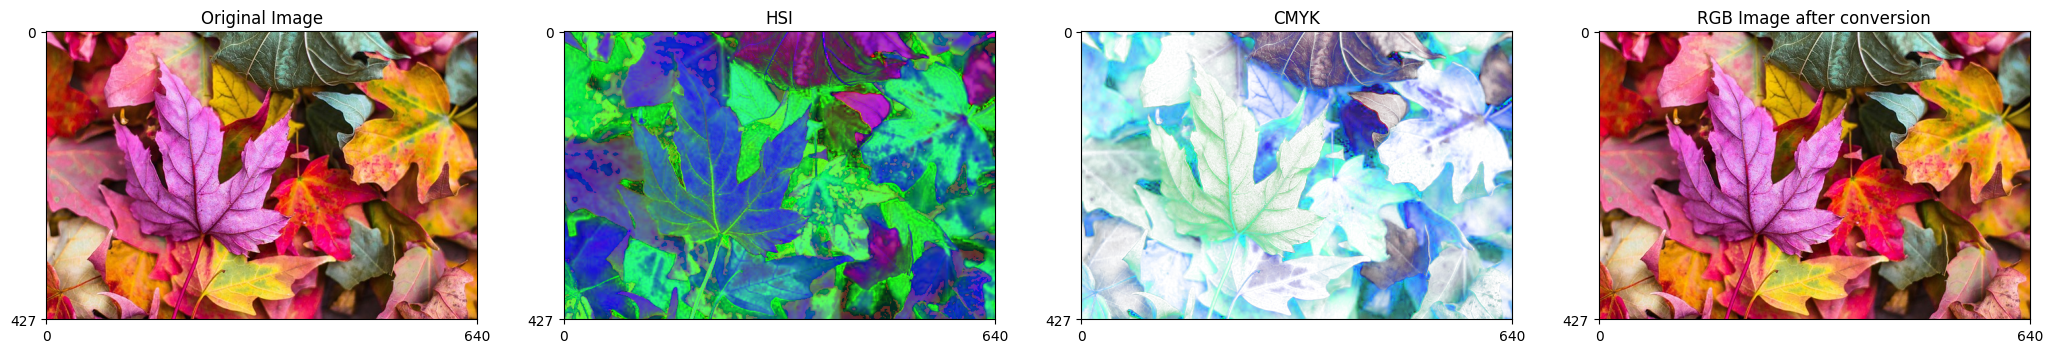

In [16]:
show_images(
    [
        (img1,"Original Image"),
        (hsi,"HSI"),
        (cmyk,"CMYK"),
        (rgb,"RGB Image after conversion")
        ], 4)

# Q2

## Read images

(-0.5, 916.5, 905.5, -0.5)

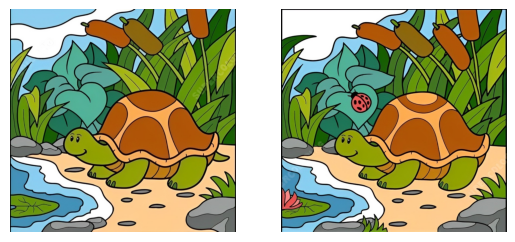

In [18]:
img2_path = 'images/2.jpg'
img2 = cv2.imread(img2_path, cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3_path = 'images/3.jpg'
img3 = cv2.imread(img3_path, cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2, (img3.shape[1], img3.shape[0]), interpolation = cv2.INTER_AREA)

plt.subplot(121)
plt.imshow(img2)
plt.axis('off')

plt.subplot(122)
plt.imshow(img3)
plt.axis('off')

## Find differences between two pictures

In [19]:
def diff(image1, image2):
    """
    Find the differences between two images.
    Args:
        image1 (numpy.ndarray): First image.
        image2 (numpy.ndarray): Second image.
    Returns:
        result (numpy.ndarray): Image showing the differences between the two input images.
    """

    #############
    gray_img2 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
    gray_img3 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)
    result = np.zeros_like(image2)
    result[:, :, 0] = gray_img2[:, :]
    result[:, :, 1] = gray_img3[:, :]
    result[:, :, 2] = gray_img3[:, :]
    #############

    return result

## Show result

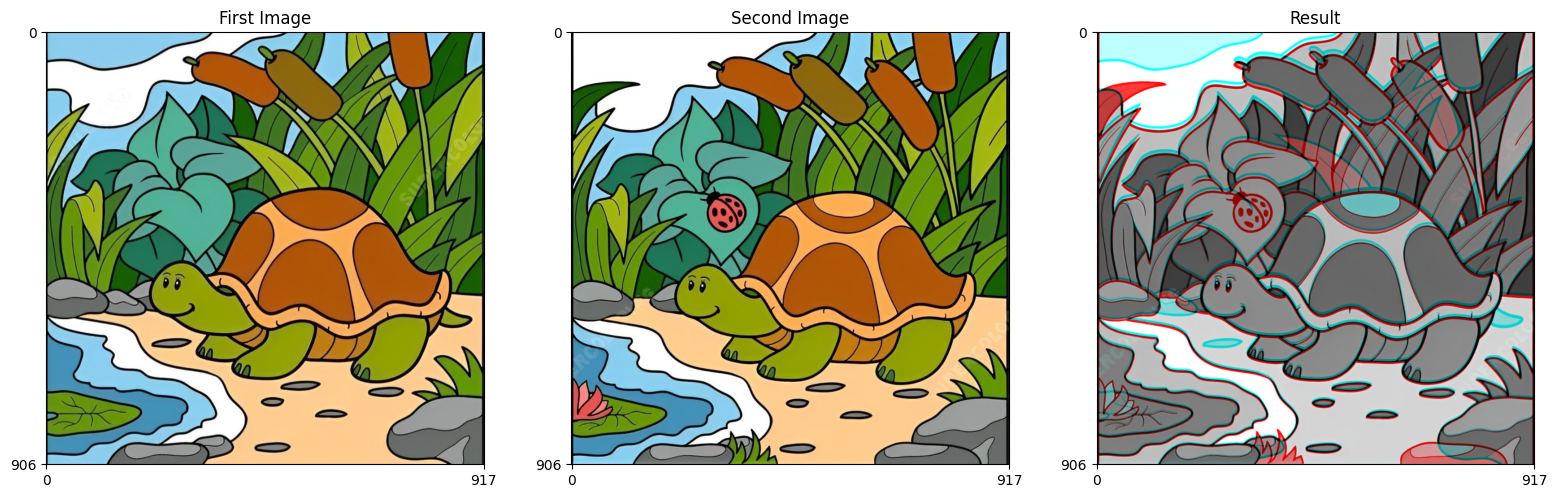

In [21]:
result = diff(img2, img3)
show_images(
    [
        (img2,"First Image"),
        (img3,"Second Image"),
        (result,"Result"),
        ], 3)